## 数据分析
利用pandas以及matplotlib获取数据的属性,以及可视化数据的一些特性,从而更好地指导我们去进行特征选择和特征构造.

我认为特征分析主要在两个阶段使用:
- 第一个阶段是模型构建之前: 从原始数据中提取特征
- 第二个阶段是模型完成之后: 构造新的特征来提高模型效果

In [1]:
train_path = r'./data/train_click_log.csv'
test_path = r'./data/testA_click_log.csv'
article_path = r'./data/articles.csv'
article_emb_path = r'./data/articles_emb.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_columns', 100)
pd.set_option('max_rows', 100)

In [3]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
article = pd.read_csv(article_path)
train = train.append(test)    #要把测试集加入到训练集中去,这样来获取测试结果
article_emb = pd.read_csv(article_emb_path)

## 第一阶段数据分析
一共有四张表:
- train: 训练集. 包含所有训练集用户的历史点击记录.
- test: 测试集. 包含所有测试集用户的历史点击记录.
- article: 包含所有文章的固有信息.
- article_emb: 训练好的article的embedding向量

本阶段的主要任务也就是查看这四张表的基本信息.常用到的方法有:head(), tail(), info(), describe(), unique(), nunique(), value_counts(), hist()等等

还有一个任务就是要把信息表合并到训练集和测试集当中去.

In [6]:
print(train.columns)
print(test.columns)
print(article.columns)
print(article_emb.columns)

Index(['user_id', 'click_article_id', 'click_timestamp', 'click_environment',
       'click_deviceGroup', 'click_os', 'click_country', 'click_region',
       'click_referrer_type'],
      dtype='object')
Index(['user_id', 'click_article_id', 'click_timestamp', 'click_environment',
       'click_deviceGroup', 'click_os', 'click_country', 'click_region',
       'click_referrer_type'],
      dtype='object')
Index(['article_id', 'category_id', 'created_at_ts', 'words_count'], dtype='object')
Index(['article_id', 'emb_0', 'emb_1', 'emb_2', 'emb_3', 'emb_4', 'emb_5',
       'emb_6', 'emb_7', 'emb_8',
       ...
       'emb_240', 'emb_241', 'emb_242', 'emb_243', 'emb_244', 'emb_245',
       'emb_246', 'emb_247', 'emb_248', 'emb_249'],
      dtype='object', length=251)


In [7]:
# 为了方便之后对四个表进行合并, 因此把train和test表中地'click_article_id'重命名为'article_id'
train = train.rename(columns={'click_article_id': 'article_id'})
test = test.rename(columns={'click_article_id': 'article_id'})

In [8]:
# 把含有article信息的表合并进来
train = train.merge(article, how='left')
test = test.merge(article, how='left')

In [10]:
train.describe()

,user_id,article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type,category_id,created_at_ts,words_count
count,1.630633e+06,1.630633e+06,1.630633e+06,1.630633e+06,1.630633e+06,1.630633e+06,1.630633e+06,1.630633e+06,1.630633e+06,1.630633e+06,1.630633e+06,1.630633e+06
mean,1.555463e+05,1.947252e+05,1.507524e+12,3.947632e+00,1.791299e+00,1.321313e+01,1.322667e+00,1.817220e+01,1.881330e+00,3.055246e+02,1.506689e+12,2.043012e+02
std,6.754384e+04,9.147543e+04,3.598953e+08,3.264832e-01,1.031280e+00,6.866810e+00,1.645919e+00,7.091755e+00,1.178867e+00,1.139629e+02,7.632826e+09,6.382198e+01
min,0.000000e+00,3.000000e+00,1.506959e+12,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.166573e+12,0.000000e+00
25%,1.055010e+05,1.241770e+05,1.507218e+12,4.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.300000e+01,1.000000e+00,2.500000e+02,1.507137e+12,1.720000e+02
50%,1.681920e+05,2.023810e+05,1.507562e+12,4.000000e+00,1.000000e+00,1.700000e+01,1.000000e+00,2.100000e+01,2.000000e+00,3.270000e+02,1.507497e+12,1.970000e+02
75%,2.127240e+05,2.771070e+05,1.507767e+12,4.000000e+00,3.000000e+00,1.700000e+01,1.000000e+00,2.500000e+01,2.000000e+00,4.090000e+02,1.507728e+12,2.290000e+02
max,2.499990e+05,3.640460e+05,1.510603e+12,4.000000e+00,5.000000e+00,2.000000e+01,1.100000e+01,2.800000e+01,7.000000e+00,4.600000e+02,1.510666e+12,6.690000e+03


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1630633 entries, 0 to 1630632
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype
---  ------               --------------    -----
 0   user_id              1630633 non-null  int64
 1   article_id           1630633 non-null  int64
 2   click_timestamp      1630633 non-null  int64
 3   click_environment    1630633 non-null  int64
 4   click_deviceGroup    1630633 non-null  int64
 5   click_os             1630633 non-null  int64
 6   click_country        1630633 non-null  int64
 7   click_region         1630633 non-null  int64
 8   click_referrer_type  1630633 non-null  int64
 9   category_id          1630633 non-null  int64
 10  created_at_ts        1630633 non-null  int64
 11  words_count          1630633 non-null  int64
dtypes: int64(12)
memory usage: 241.7 MB


In [9]:
train.head(10)

,user_id,article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type,category_id,created_at_ts,words_count
0,199999,160417,1507029570190,4,1,17,1,13,1,281,1506942089000,173
1,199999,5408,1507029571478,4,1,17,1,13,1,4,1506994257000,118
2,199999,50823,1507029601478,4,1,17,1,13,1,99,1507013614000,213
3,199998,157770,1507029532200,4,1,17,1,25,5,281,1506983935000,201
4,199998,96613,1507029671831,4,1,17,1,25,5,209,1506938444000,185
5,199998,144978,1507029804858,4,1,17,1,25,5,269,1506695631000,181
6,199998,285371,1507029834858,4,1,17,1,25,5,412,1506663059000,166
7,199997,224171,1507029683061,4,1,17,1,16,1,354,1507013963000,156
8,199997,223931,1507029713061,4,1,17,1,16,1,354,1506794753000,193
9,199996,299697,1507029600494,4,1,17,1,25,2,428,1506984684000,176


In [25]:
train['article_id'].value_counts().reset_index()[:10]

,index,article_id
0,272143,15935
1,234698,15666
2,123909,15383
3,336221,15170
4,96210,14009
5,336223,13998
6,183176,13277
7,168623,13041
8,162655,11968
9,331116,11511


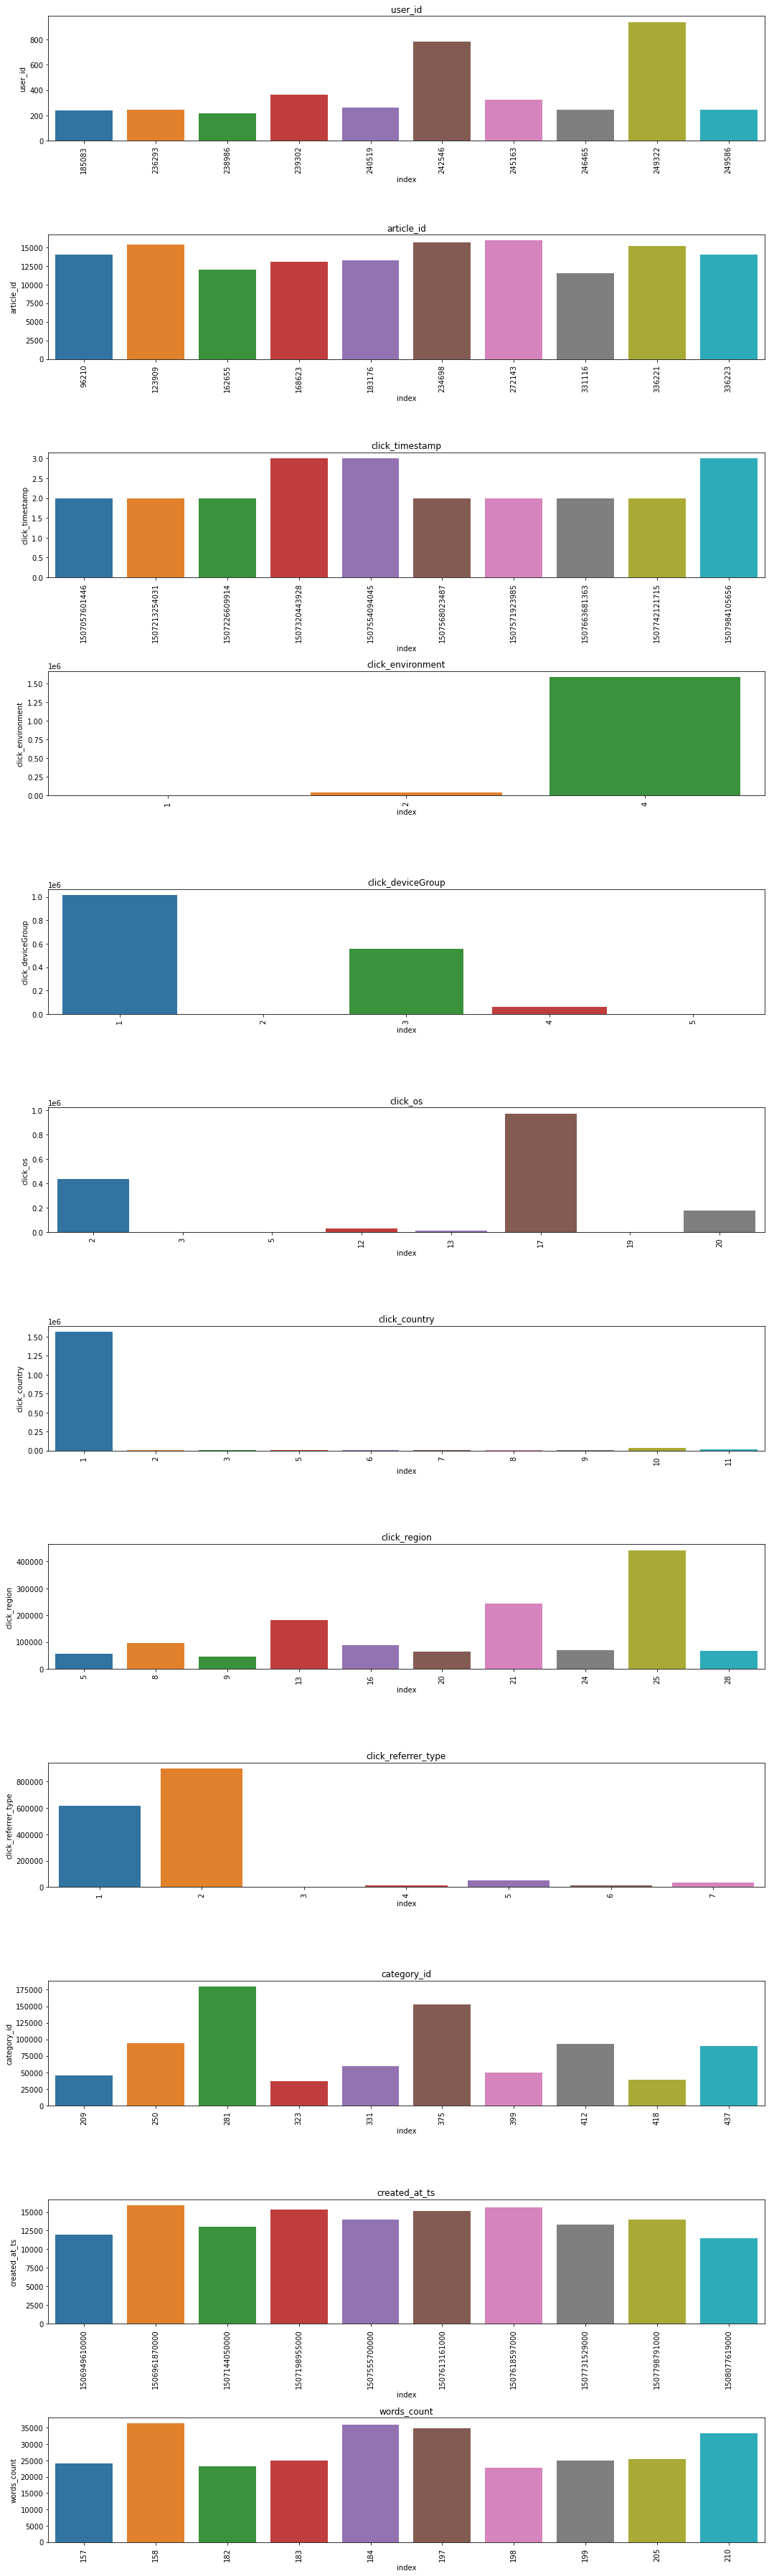

In [26]:
import seaborn as sns   # seaborn是matplotlib的高阶api
plt.figure(figsize=(15, 50))    #设置整个画图大小
for i, col in enumerate(train.columns):
    plot_envs = plt.subplot(len(train.columns), 1, i+1)
    vc = train[col].value_counts().reset_index()[:10]   #只取前10多的画图?
    fig = sns.barplot(x=vc['index'], y=vc[col])    #index是标签, col列表示的计数值. 且发现在x轴上会自动按照大小进行排序
    for item in fig.get_xticklabels():
        item.set_rotation(90)    # 把x轴的标签旋转一下,为了美观
    plt.title(col)
plt.tight_layout()
plt.show()


## 第二阶段数据分析
- 用户重复点击分析
- 用户点击环境变化分析
- 用户点击新闻数量的分布
- 新闻点击次数的分布
- 新闻共频次数: 两篇新闻连续出现的次数
- 新闻文章信息
- 用户点击的新闻类型的偏好
- 用户查看文章的长度分布
- 用户点击新闻的时间分析

<font color=red>如果在这些分析中发现具有差异性,那么可以使用这些信息来构造新的特征</font>

### 统计用户重复点击次数
先通过分组聚合的方式统计每个(user, article)对出现的次数
然后通过value_counts就可以就计算出所有重复出现的次数

In [32]:
user_click = train.append(test)
user_click_count = user_click.groupby(['user_id', 'article_id'])['click_timestamp'].agg({'count'}).reset_index()
user_click_count[user_click_count['count']>10]

,user_id,article_id,count
576902,134850,69463,13
1228650,214382,71236,12
1232615,214797,25058,12
1340851,227022,208145,12
1368439,229739,70095,12
1495286,240568,64409,14
1555743,245163,341287,12
1555744,245163,341288,12


In [33]:
user_click_count['count'].value_counts()

1     1098265
2      513949
4        4982
3         231
6         197
8          43
5          16
10         14
12          6
7           2
14          1
13          1
Name: count, dtype: int64

### 用户点击环境变化分析
其实就是随意选出多个用户,然后取出这些用户的所有点击记录,然后进行画图.
最后发现click_region和click_referer_type在用户中是最容易发生改变的.

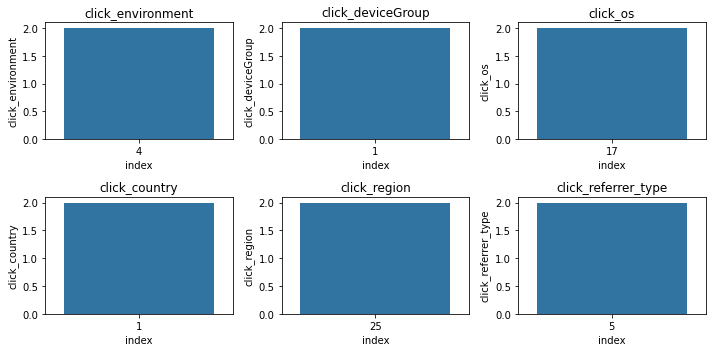

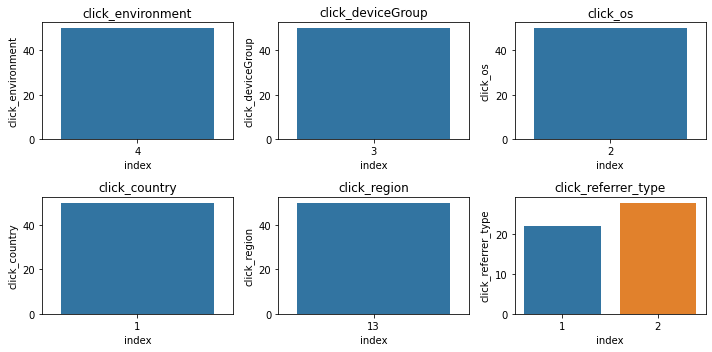

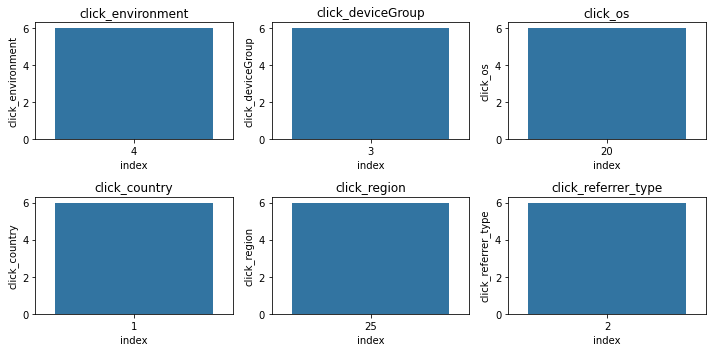

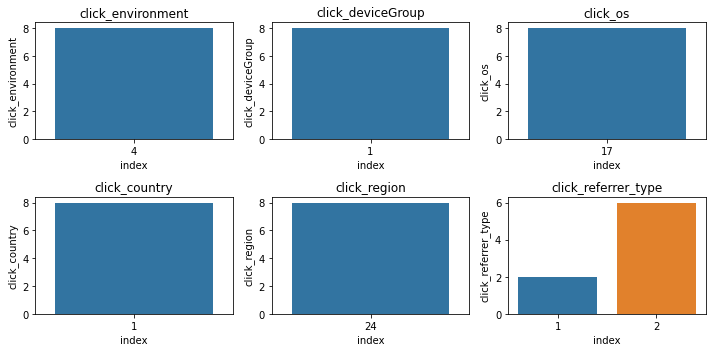

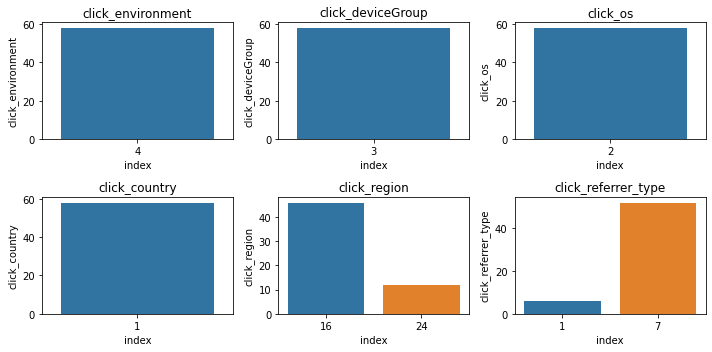

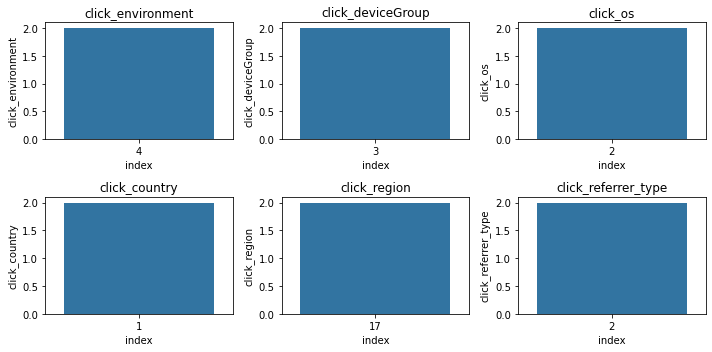

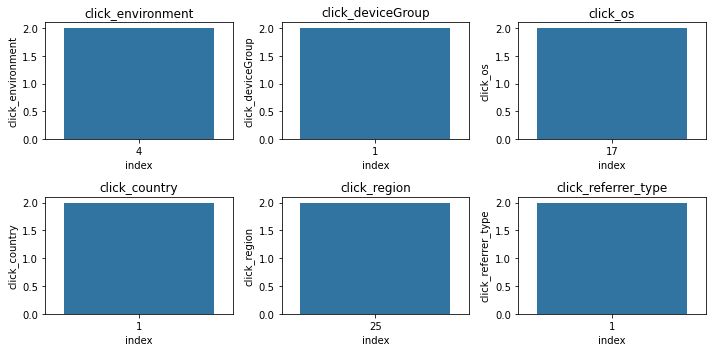

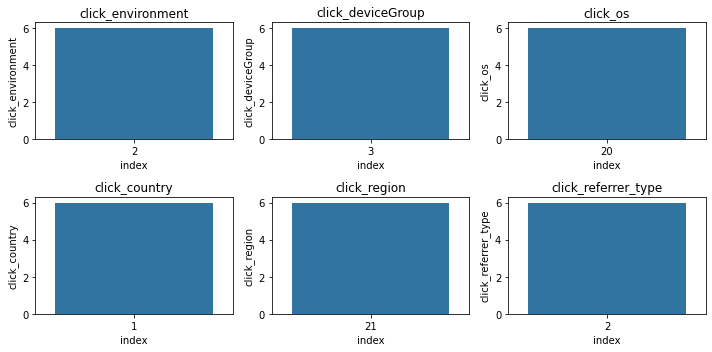

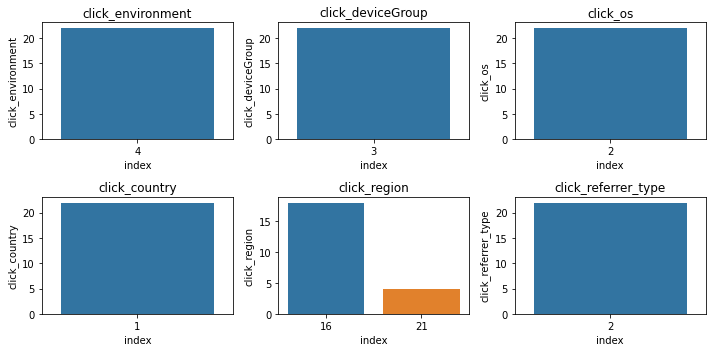

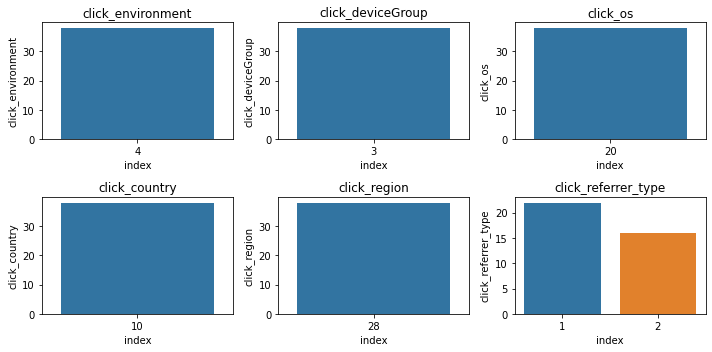

In [37]:
def plot_envs(df, cols, r, c):
    plt.figure(figsize=(10, 5))
    for i, col in enumerate(cols):
        plt.subplot(r, c, i+1)
        v = df[col].value_counts().reset_index()
        fig = sns.barplot(x=v['index'], y=v[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()
# 分析用户点击环境变化是否明显，这里随机采样10个用户分析这些用户的点击环境分布
sample_user_ids = np.random.choice(test['user_id'].unique(), size=10, replace=False)    # 从测试集中随机取出10个用户id
sample_users = user_click[user_click['user_id'].isin(sample_user_ids)]    #筛选出随即得到的用户的所有记录
cols = ['click_environment','click_deviceGroup', 'click_os', 'click_country', 'click_region','click_referrer_type']
for _, user_df in sample_users.groupby('user_id'):
    plot_envs(user_df, cols, 2, 3)

### 用户点击新闻数量的分布
先按照user_id进行分组,得到每个user各自所有交互记录的Dataframe.然后使用.count函数统计每个dataframe的行数,也就是记录数(点击数),形成一个列表.
这样我们就可以得到划分用户活跃度的标准.因为在很多时候,我们要先去掉那些过于活跃的用户.

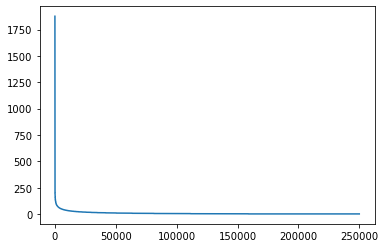

In [44]:
user_click_item_count = sorted(user_click.groupby('user_id')['article_id'].count(), reverse=True)
plt.plot(user_click_item_count)

### 新闻被点击数量分布
做法其实和用户点击新闻数量分布非常类似

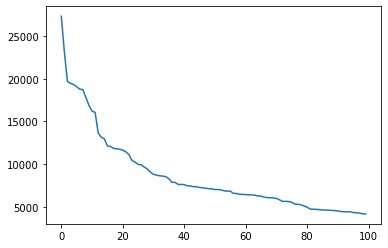

In [47]:
item_click_count = sorted(user_click.groupby('article_id')['user_id'].count(), reverse=True)
plt.plot(item_click_count[:100])

### 新闻共频次数: 两篇新闻连续出现的次数


In [51]:
tmp = user_click.sort_values('click_timestamp')
tmp['next_item'] = tmp.groupby(['user_id'])['article_id'].transform(lambda x:x.shift(-1))
tmp.head(10)
union_item = tmp.groupby(['article_id','next_item'])['click_timestamp'].agg({'count'}).reset_index().sort_values('count', ascending=False)
union_item[['count']].describe()

,count
count,448965.000000
mean,4.228933
std,51.448910
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,11395.000000


### 新闻信息的统计
主要就是统计数据表合并后,新闻的固有属性在整个数据集中的分布.

一共两个主要的属性:category_id, words_count

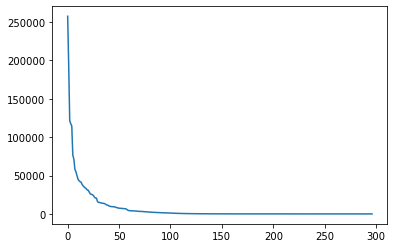

In [52]:
plt.plot(user_click['category_id'].value_counts().values)

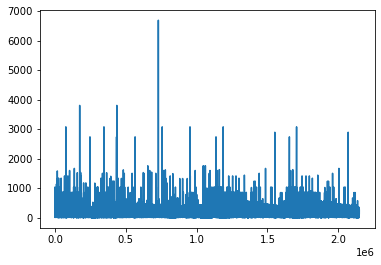

In [53]:
plt.plot(user_click['words_count'].values)

In [55]:
user_click.shape

(2148643, 12)

### 用户点击的新闻类型的偏好
统计每个用户所有的交互记录中,不同的新闻类型有多少种.

具体操作的话就是先使用user_id进行分组,然后使用nunique来统计每个user对应的dataframe中有多少个不同的category_id


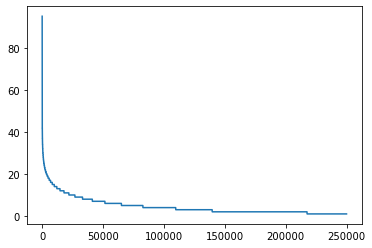

In [56]:
plt.plot(sorted(user_click.groupby('user_id')['category_id'].nunique(), reverse=True))

### 用户查看文章的长度的分布
统计每个用户所有交互过的文章的平均字数

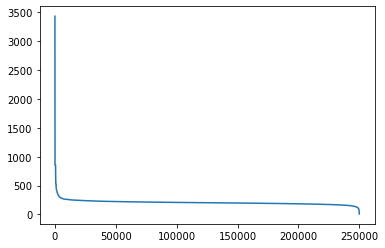

In [57]:
plt.plot(sorted(user_click.groupby('user_id')['words_count'].mean(), reverse=True))

### 用户点击新闻的时间分析